<a href="https://colab.research.google.com/github/yufucai/SoAI-homework/blob/master/hm1_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##数据加载
三行魔法命令，以%开头，直接在代码开头闭眼写上就行。  
魔法命令是Jupyter Notebook本身的特定指令，不是Python代码。功能是：  
① 如果包的底层代码被修改，程序将自动重新加载；  
② 可直接在笔记本内显示matplotlib图。%Ismagic可以查看所有的魔法命令。

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

加载需要用到的库/工具，包括图像识别和结果评价。  
设置每次导入的图片数量



In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
bs = 8

下载解压图片数据，URLs是一个数据集包

In [0]:
path = untar_data(URLs.PETS); path #下载数据集并显示执行结果
path.ls() #查看数据文件内容
path_anno = path/'annotations' #找到存储标签数据的文件夹
path_img = path/'images' #找到存储图片数据的文件夹
fnames = get_image_files(path_img) #获得所有图片地址，存储到list中
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_192.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_147.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_36.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_115.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_111.jpg')]

设置随机种子，确保每次训练后的验证数据集相同。  
用re从文件名中提取图片标注label，Python的re模块类似于正则表达式匹配操作。
[re解释](https://github.com/EmbraceLife/shendusuipian/issues/62)



['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

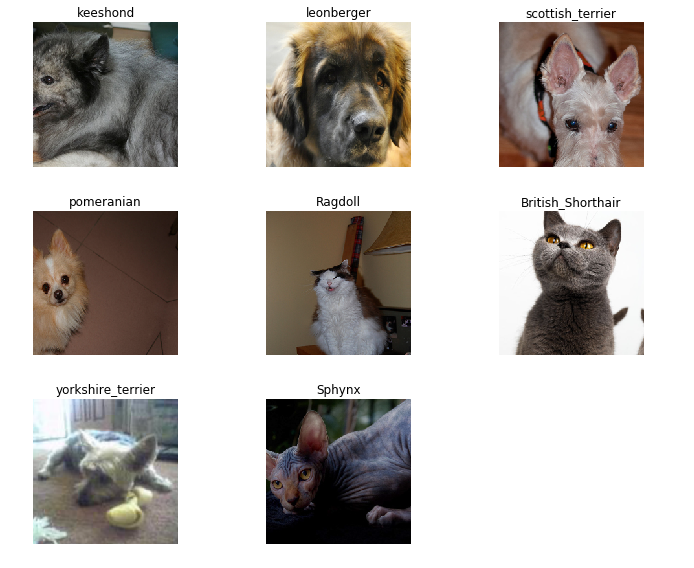

In [0]:
np.random.seed(2)
#正则表达式匹配
pat = r'/([^/]+)_\d+.jpg$'
#生成数据集，包括训练集和验证集，测试集可选；图片处理的均值与方差
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(),
                                  size = 224, bs = bs).normalize(imagenet_stats)
data.show_batch(rows = 3, figsize = (10,8))
print(data.classes) #打印类别名称
len(data.classes)

In [0]:
?ImageDataBunch

In [0]:
?normalize

##resnet34模型训练


In [0]:
#创建一个CNN模型，使用data作为数据，下载和调用resnet34作为模型框架和参数，同时打印错误率
learn = create_cnn(data, models.resnet34, metrics = error_rate)
learn.model #查看模型内部结构

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 59904580.28it/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(1) #完整训练数据一遍

epoch,train_loss,valid_loss,error_rate,time
0,0.831239,0.298720,0.089986,01:45


In [0]:
learn.save('stage1')

##训练成果
1. 查看模型容易混淆的种类
2. 画出confusion matrix，发现是不对称的，模型可能只在某些类别容易出错

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

In [0]:
?top_losses

Object `top_losses` not found.


In [0]:
?valid_ds

Object `valid_ds` not found.


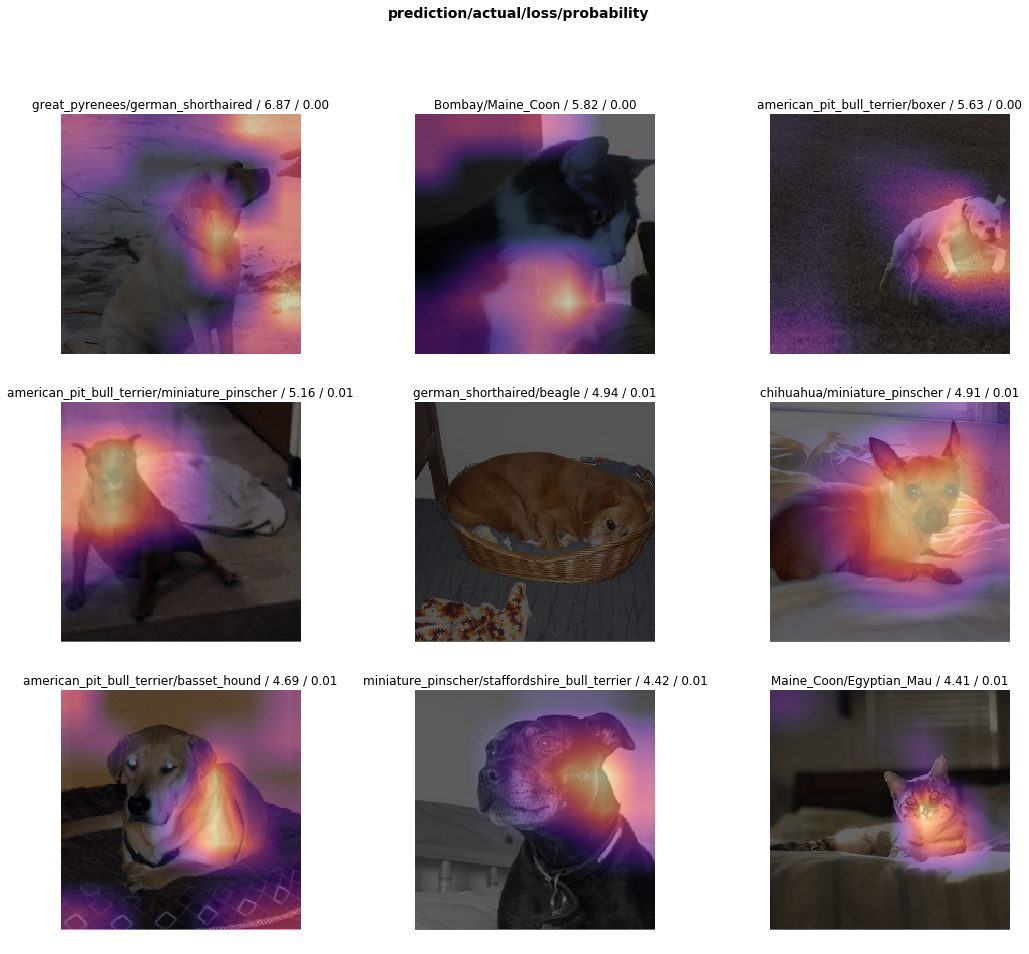

In [0]:
interp.plot_top_losses(9, figsize = (18, 15))

In [0]:
# ?error:doc(interp.plot_top_losses)

TypeError: ignored

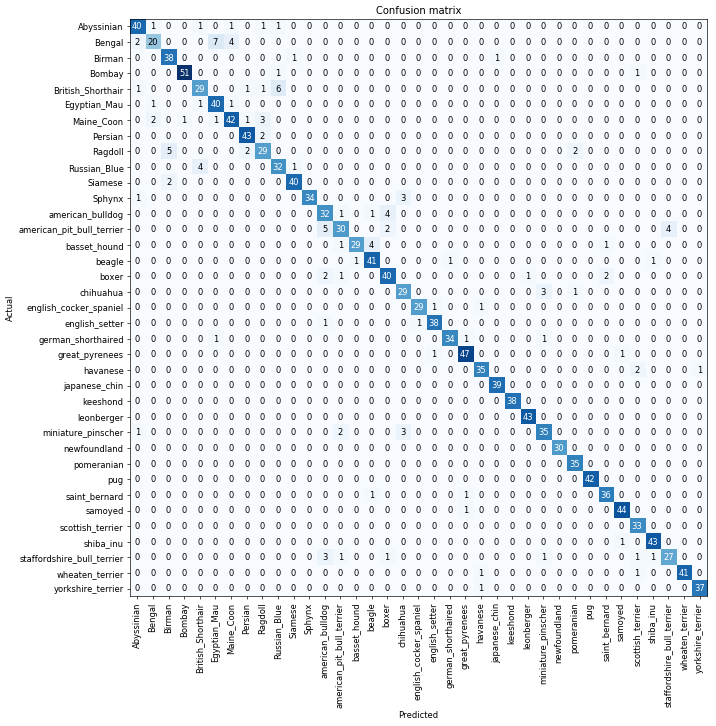

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val = 2)

[('Bengal', 'Egyptian_Mau', 7),
 ('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 5),
 ('Bengal', 'Maine_Coon', 4),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('american_bulldog', 'boxer', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('basset_hound', 'beagle', 4),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Sphynx', 'chihuahua', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Ragdoll', 'pomeranian', 2),
 ('Siamese', 'Birman', 2),
 ('american_pit_bull_terrier', 'boxer', 2),
 ('boxer', 'american_bulldog', 2),
 ('boxer', 'saint_bernard', 2),
 ('havanese', 'scottish_terrier', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2)]

##解冻，微调，学习率
模型验证正常，解冻模型并做更多层的训练  
[模型训练之前为何要先unfreeze](https://forums.fast.ai/t/why-do-we-need-to-unfreeze-the-learner-everytime-before-retarining-even-if-learn-fit-one-cycle-works-fine-without-learn-unfreeze/41614) 模型训练的一般步骤：① 载入模型，如resnet34；② freeze初始层，论文；③ 训练模型，`learn.fit_one_cycle( )`,`lr_find()`寻找最佳学习率；④ 解冻模型；⑤ 训练模型，`learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))`；⑥ 保存模型。  
[freeze和unfreeze的功能](https://forums.fast.ai/t/can-anyone-explain-me-what-does-freeze-and-unfreeze-do/42025) freeze：网络只有最后一层的权重会更新，如猫狗识别中只有猫狗那一层参数会更新；unfreeze：网络的所有权重都会更新。`freeze_to(n:int)`可以冻住指定的层。

In [0]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1) #此行多余？

epoch,train_loss,valid_loss,error_rate,time
0,1.019109,0.420976,0.140731,01:49


In [0]:
learn.load('stage1')

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


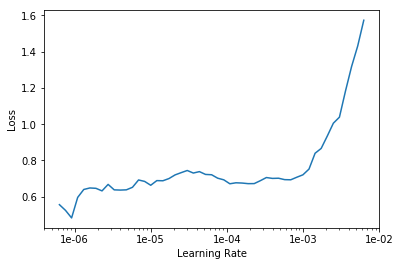

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.673329,0.262079,0.081867,01:46


In [0]:
learn.save('stage2')

##resnet50模型训练

训练更大的模型，细节可参考[论文](https://arxiv.org/pdf/1512.03385.pdf)   
采用更大的图片训练，减少每次导入的图片数量

In [0]:
 data50 = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(),
                                   size = 299, bs = bs//2).normalize(imagenet_stats)

In [37]:
learn50 = create_cnn(data50,models.resnet50, metrics = error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


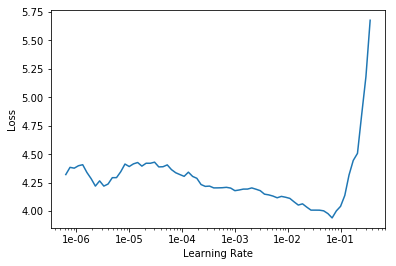

In [39]:
learn50.lr_find()
learn50.recorder.plot()

In [40]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.089709,0.463502,0.144114,01:45


In [0]:
learn.save('stage3')

In [42]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.825849,0.387227,0.122463,01:47


如果效果不好，调回之前的模型继续训练

In [43]:
learn.load('stage3')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scottish_terrier,miniature_pinscher,saint_bernard,pug,keeshond
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Birman,pug,keeshond,keeshond,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1

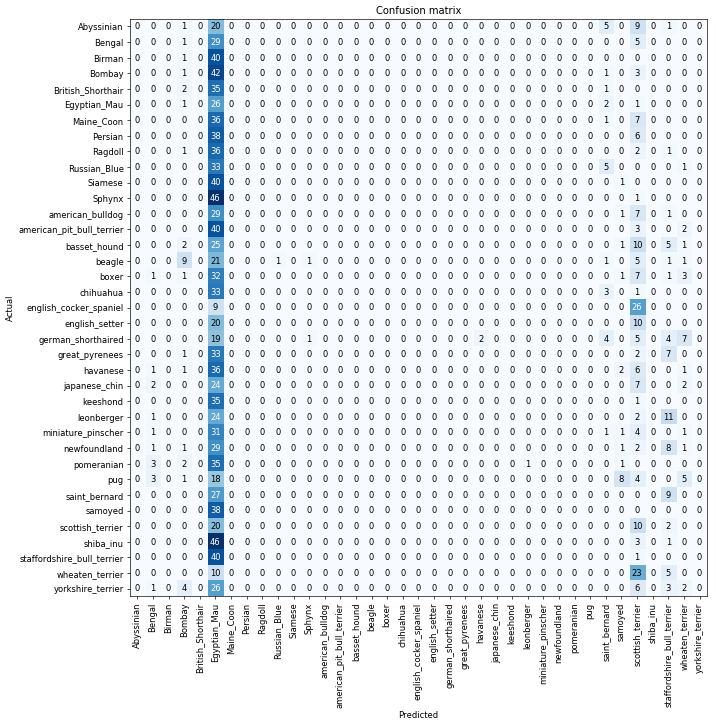

In [47]:
interp50 = ClassificationInterpretation.from_learner(learn50)
interp50.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


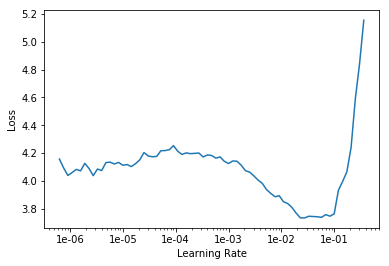

In [48]:
learn50.lr_find()
learn50.recorder.plot()

In [49]:
learn50.unfreeze()
learn50.fit_one_cycle(4, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.196991,1.013637,0.212449,03:05
1,1.137677,0.357162,0.103518,03:04
2,0.765023,0.270745,0.085927,03:02
3,0.705016,0.264490,0.080514,03:01


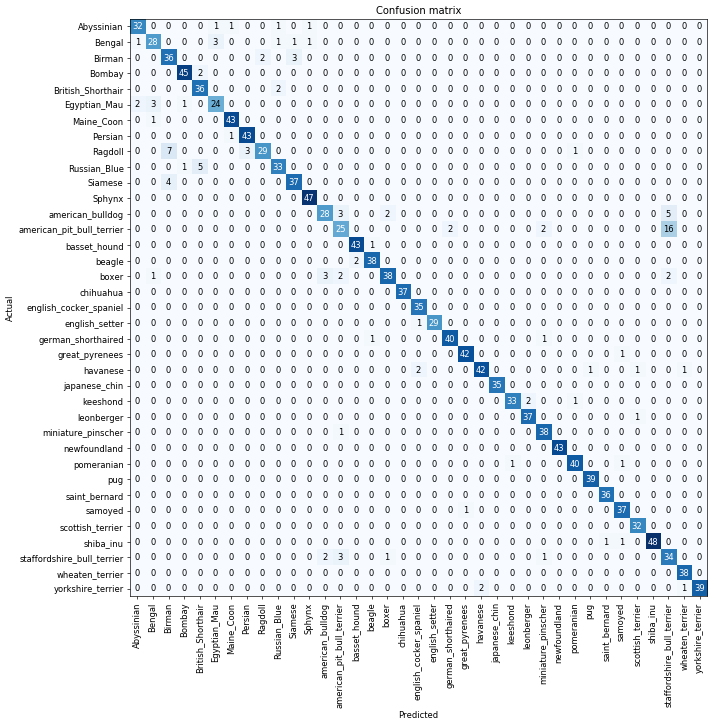

In [50]:
interp50 = ClassificationInterpretation.from_learner(learn50)
interp50.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

In [0]:
learn50.save('stage4')

##MNIST手写数据集

In [4]:
path = untar_data(URLs.MNIST_SAMPLE);path

PosixPath('/root/.fastai/data/mnist_sample')

['3', '7']

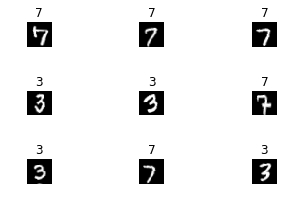

In [9]:
tfms = get_transforms(do_flip = False)
data = ImageDataBunch.from_folder(path, ds_tfms = tfms, size = 26)
data.show_batch(rows = 3, figsize = (5,3))
data.classes

In [10]:
learn = cnn_learner(data, models.resnet18, metrics = accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 138243565.49it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.147480,0.089251,0.965162,00:17
1,0.090288,0.050240,0.984789,00:17


In [11]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


##多种导入数据方法

In [13]:
data = ImageDataBunch.from_csv(path, ds_tfms = tfms, size = 28)
data.classes

[0, 1]

In [14]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [15]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [16]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [17]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [18]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']